# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [14]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

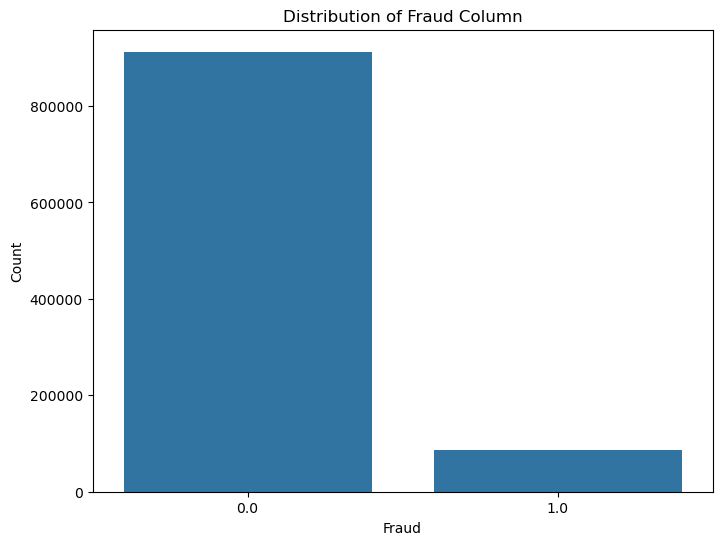

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [20]:
# Plotting the distribution of the 'fraud' column
plt.figure(figsize=(8, 6))
sns.countplot(x='fraud', data=fraud)
plt.title('Distribution of Fraud Column')
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.show()

# Displaying the value counts for additional insight
fraud_counts = fraud['fraud'].value_counts()
fraud_counts

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the features (X) and the target (y)
X = fraud.drop('fraud', axis=1)
y = fraud['fraud']

# Identify the numerical columns
numerical_cols = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [27]:
X_train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
506532,-0.242599,-0.137685,-0.576500,1.0,0.0,0.0,0.0
327991,-0.362928,-0.191469,1.248963,1.0,0.0,0.0,1.0
715937,-0.351508,-0.179028,0.044170,1.0,0.0,0.0,1.0
860726,-0.208932,0.124909,-0.595091,1.0,1.0,0.0,1.0
78617,-0.326121,-0.133889,-0.533174,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
259178,-0.398974,-0.060248,-0.605334,0.0,0.0,0.0,0.0
365838,1.333129,-0.188502,-0.107355,1.0,0.0,0.0,0.0
131932,-0.094131,-0.194719,-0.324696,1.0,0.0,0.0,0.0
671155,-0.254928,-0.188387,-0.232201,1.0,0.0,0.0,1.0


In [29]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.95849
Confusion Matrix:
 [[271912   1959]
 [ 10494  15635]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273871
         1.0       0.89      0.60      0.72     26129

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.95    300000



The confusion matrix shows that the model correctly identifies the majority of non-fraudulent transactions (TN) and has a relatively lower performance in identifying fraudulent transactions (TP).

In [32]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model on the resampled data
log_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_resampled = log_reg.predict(X_test)

# Evaluate the resampled model
print("Accuracy:", accuracy_score(y_test, y_pred_resampled))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_resampled))
print("Classification Report:\n", classification_report(y_test, y_pred_resampled))

Accuracy: 0.93418
Confusion Matrix:
 [[255412  18459]
 [  1287  24842]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    273871
         1.0       0.57      0.95      0.72     26129

    accuracy                           0.93    300000
   macro avg       0.78      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000



Oversampling (SMOTE) has effectively balanced the dataset, resulting in a model that shows improved performance in detecting fraudulent transactions. Despite a slight decrease in overall accuracy, the model's ability to identify fraudulent transactions (as indicated by higher recall and a reasonable F1-score) has significantly improved. This balanced approach is crucial in scenarios where the minority class (fraud) is of particular interest and requires adequate detection.

In [35]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numerical columns
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply undersampling to the training data
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model on the resampled data
log_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_resampled = log_reg.predict(X_test)

# Evaluate the resampled model
print("Accuracy:", accuracy_score(y_test, y_pred_resampled))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_resampled))
print("Classification Report:\n", classification_report(y_test, y_pred_resampled))

Accuracy: 0.9336866666666667
Confusion Matrix:
 [[255238  18633]
 [  1261  24868]]
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    273871
         1.0       0.57      0.95      0.71     26129

    accuracy                           0.93    300000
   macro avg       0.78      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000



Undersampling has effectively balanced the dataset, resulting in a model that shows improved performance in detecting fraudulent transactions. The model's ability to identify fraudulent transactions (as indicated by higher recall and a reasonable precision) has significantly improved compared to the unbalanced dataset. While undersampling has slightly reduced the overall accuracy, it has provided a more balanced view of model performance across both classes.